<a href="https://colab.research.google.com/github/pandearthr/learn-pandas/blob/main/updateUTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORT LIBRARY**

In [4]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


**2. LOAD DATASET**

In [16]:
from google.colab import files
import pandas as pd

# Upload file CSV dari laptop
uploaded = files.upload()

# Ambil nama file pertama secara otomatis
filename = list(uploaded.keys())[0]

# Load dataset ke DataFrame
df = pd.read_csv(filename, encoding='latin1')
df.head()

Saving baju_thriftingg.csv to baju_thriftingg.csv


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username;;;;;;;
0,1986646440144478253,Fri Nov 07 04:06:36 +0000 2025,0,Menteri Perdagangan (Mendag) Budi Santoso buka...,1986646440144478253,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198664644014447...,4755284968,;;;;;;;
1,1986640662880788584,Fri Nov 07 03:45:45 +0000 2025,0,@sjwsantun ayo kita jadwalkan thrifting baju k...,1986641193246343641,NaN,sjwsantun,in,NaN,0,1,0,https://x.com/undefined/status/198664119324634...,941243650054406144,;;;;;;;
2,1986498987701248404,Thu Nov 06 18:20:40 +0000 2025,0,Era thriting di market place Indonesia berakhi...,1986498987701248404,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/198649898770124...,537442450,;;;;;;;
3,1986479639930544149,Thu Nov 06 17:03:47 +0000 2025,0,dapet baju bagus di pasar loak tuh sesenang it...,1986479639930544149,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198647963993054...,1289197162790711297,;;;;;;;
4,1986453130041864479,Thu Nov 06 15:18:27 +0000 2025,0,Lagi jual thrifting kyk jual baju distro modal...,1986453130041864479,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198645313004186...,256008602,;;;;;;;


**3. PREPROCESSING**

In [21]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+|#", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

df['clean_text'] = df['full_text'].apply(clean_text)
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username;;;;;;;,clean_text
0,1986646440144478253,Fri Nov 07 04:06:36 +0000 2025,0,Menteri Perdagangan (Mendag) Budi Santoso buka...,1986646440144478253,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198664644014447...,4755284968,;;;;;;;,menteri perdagangan mendag budi santoso buka s...
1,1986640662880788584,Fri Nov 07 03:45:45 +0000 2025,0,@sjwsantun ayo kita jadwalkan thrifting baju k...,1986641193246343641,NaN,sjwsantun,in,NaN,0,1,0,https://x.com/undefined/status/198664119324634...,941243650054406144,;;;;;;;,ayo kita jadwalkan thrifting baju kerja itu
2,1986498987701248404,Thu Nov 06 18:20:40 +0000 2025,0,Era thriting di market place Indonesia berakhi...,1986498987701248404,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/198649898770124...,537442450,;;;;;;;,era thriting di market place indonesia berakhi...
3,1986479639930544149,Thu Nov 06 17:03:47 +0000 2025,0,dapet baju bagus di pasar loak tuh sesenang it...,1986479639930544149,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198647963993054...,1289197162790711297,;;;;;;;,dapet baju bagus di pasar loak tuh sesenang it...
4,1986453130041864479,Thu Nov 06 15:18:27 +0000 2025,0,Lagi jual thrifting kyk jual baju distro modal...,1986453130041864479,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198645313004186...,256008602,;;;;;;;,lagi jual thrifting kyk jual baju distro modal...


**4. LEXICON-BASED SENTIMENT**

In [23]:
positive_words = ["murah", "bagus", "keren", "cakep", "ori", "berkualitas",
                  "mantap", "recommended", "puas"]

negative_words = ["jelek", "bau", "rusak", "penipuan", "tipu", "buruk",
                  "ripoff", "sampah", "menyesal"]

def lexicon_sentiment(text):
    text_split = text.split()

    score = 0
    for w in text_split:
        if w in positive_words:
            score += 1
        elif w in negative_words:
            score -= 1

    if score > 0:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

df['label'] = df['clean_text'].apply(lexicon_sentiment)
df.head()


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username;;;;;;;,clean_text,label
0,1986646440144478253,Fri Nov 07 04:06:36 +0000 2025,0,Menteri Perdagangan (Mendag) Budi Santoso buka...,1986646440144478253,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198664644014447...,4755284968,;;;;;;;,menteri perdagangan mendag budi santoso buka s...,0
1,1986640662880788584,Fri Nov 07 03:45:45 +0000 2025,0,@sjwsantun ayo kita jadwalkan thrifting baju k...,1986641193246343641,NaN,sjwsantun,in,NaN,0,1,0,https://x.com/undefined/status/198664119324634...,941243650054406144,;;;;;;;,ayo kita jadwalkan thrifting baju kerja itu,0
2,1986498987701248404,Thu Nov 06 18:20:40 +0000 2025,0,Era thriting di market place Indonesia berakhi...,1986498987701248404,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/198649898770124...,537442450,;;;;;;;,era thriting di market place indonesia berakhi...,0
3,1986479639930544149,Thu Nov 06 17:03:47 +0000 2025,0,dapet baju bagus di pasar loak tuh sesenang it...,1986479639930544149,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198647963993054...,1289197162790711297,;;;;;;;,dapet baju bagus di pasar loak tuh sesenang it...,1
4,1986453130041864479,Thu Nov 06 15:18:27 +0000 2025,0,Lagi jual thrifting kyk jual baju distro modal...,1986453130041864479,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198645313004186...,256008602,;;;;;;;,lagi jual thrifting kyk jual baju distro modal...,0


**5. VISUALISASI DISTRIBUSI SENTIMEN**

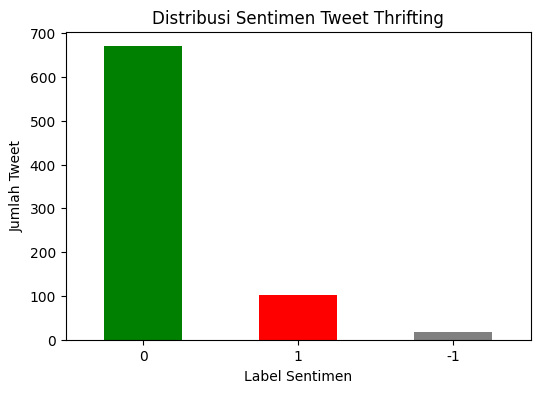

In [24]:
plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.xticks(rotation=0)
plt.title("Distribusi Sentimen Tweet Thrifting")
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah Tweet")
plt.show()


**6. TF-IDF**

In [25]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

X.shape


(791, 3000)

**7. TRAINING NAIVE BAYES**

The Accuracy is 88.68%
[[  0   3   0]
 [  0 141   0]
 [  0  15   0]]
The classification report is:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.89      1.00      0.94       141
           1       0.00      0.00      0.00        15

    accuracy                           0.89       159
   macro avg       0.30      0.33      0.31       159
weighted avg       0.79      0.89      0.83       159



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


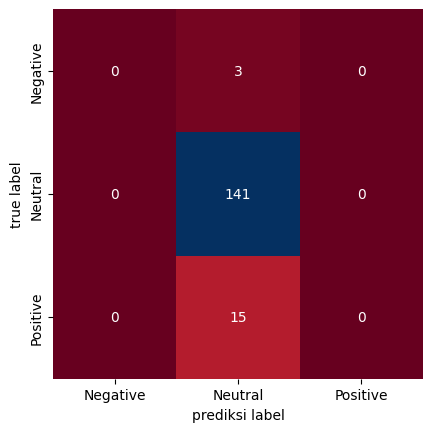

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Split the data into training and testing sets
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bayes = MultinomialNB()
##tahapan untuk menjalankan training
bayes.fit(x_train_tfidf,y_train)

#menjalankan data testing
nb_result = bayes.predict(x_test_tfidf)
from sklearn import metrics
model = metrics.accuracy_score(y_test, nb_result)
print("The Accuracy is",str('{:04.2f}'.format(model*100))+'%')

from sklearn.metrics import confusion_matrix
matrix2= confusion_matrix(y_test, nb_result)
print(matrix2)

import seaborn as sns
sns.heatmap(matrix2, square= True, annot= True, cbar= False, cmap='RdBu', xticklabels=['Negative','Neutral', 'Positive'], yticklabels= ['Negative','Neutral', 'Positive'], fmt= 'g')
plt.xlabel('prediksi label')
plt.ylabel('true label')

from sklearn.metrics import classification_report
print("The classification report is:")
print(classification_report(y_test, nb_result))

**8. EVALUASI**

Accuracy: 0.8867924528301887

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.89      1.00      0.94       141
           1       0.00      0.00      0.00        15

    accuracy                           0.89       159
   macro avg       0.30      0.33      0.31       159
weighted avg       0.79      0.89      0.83       159



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


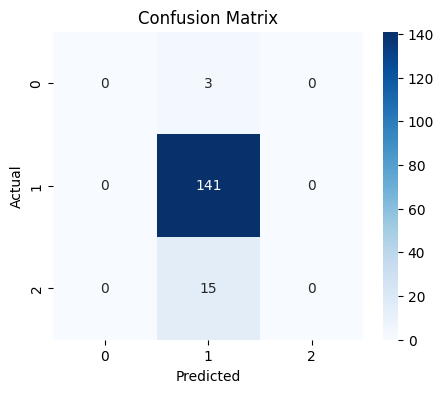

In [29]:
print("Accuracy:", accuracy_score(y_test, nb_result))
print("\nClassification Report:\n", classification_report(y_test, nb_result))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, nb_result), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()